### Imports

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Options

In [64]:
SEPARATOR = '|'
TEST_YEAR = 22

In [65]:
TRAIN_DATASET = "../data/UH_2023_TRAIN.txt"

In [66]:
GLOBAL_FIG_SIZE = (5, 10)

# 1. Loading and summarizing data

In [67]:
df = pd.read_csv(TRAIN_DATASET, sep=SEPARATOR)

In [68]:
df_train = df[df["CAMPAÑA"] != TEST_YEAR]; df_train

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660,26,2,0,1,0.000,22215.0
1,14,84318,515,4,660,26,2,0,1,0.000,22215.0
2,14,85579,340,4,520,32,2,0,1,0.000,20978.0
3,14,69671,340,4,520,32,2,0,1,0.000,40722.0
4,14,14001,852,14,NaN,81,1,0,1,0.000,14126.0
...,...,...,...,...,...,...,...,...,...,...,...
8521,21,37461,239,6,700,52,2,0,1,3.680,28160.1
8522,21,58769,239,6,700,32,2,0,1,4.250,41310.0
8523,21,58769,239,6,700,59,2,0,1,4.160,45420.0
8524,21,88928,239,6,700,40,2,0,1,4.750,56140.0


In [69]:
df_test = df[df["CAMPAÑA"] == TEST_YEAR]; df_test

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
8526,22,48626,302,13,600,32,2,0,1,3.7503,NaN
8527,22,47921,302,13,600,32,2,0,1,7.3735,NaN
8528,22,5696,919,14,650-660,59,1,0,1,7.6200,NaN
8529,22,98814,919,14,650-660,32,2,0,1,3.3267,NaN
8530,22,98814,919,14,650-660,40,2,0,1,2.7724,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,6,700,52,2,0,1,3.6800,NaN
9597,22,58769,239,6,700,32,2,0,1,4.2500,NaN
9598,22,58769,239,6,700,59,2,0,1,4.0700,NaN
9599,22,88928,239,6,700,40,2,0,1,4.5727,NaN


In [70]:
df_train.dtypes

CAMPAÑA          int64
ID_FINCA         int64
ID_ZONA          int64
ID_ESTACION      int64
ALTITUD         object
VARIEDAD         int64
MODO             int64
TIPO             int64
COLOR            int64
SUPERFICIE     float64
PRODUCCION     float64
dtype: object

In [71]:
df_train.describe()

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
count,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000,8526.000000
mean,17.423411,50668.724255,498.126906,12.155172,45.450739,1.490500,0.011963,0.848229,0.517420,9209.190958
std,2.307338,28976.960098,260.885775,4.755262,23.699281,0.499939,0.108728,0.358820,1.572784,13268.812623
min,14.000000,200.000000,7.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.718000
25%,15.000000,25026.000000,284.000000,7.000000,17.000000,1.000000,0.000000,1.000000,0.000000,1940.000000
50%,17.000000,50799.000000,464.000000,12.000000,52.000000,1.000000,0.000000,1.000000,0.000000,4620.000000
75%,19.000000,75832.000000,726.000000,16.000000,59.000000,2.000000,0.000000,1.000000,0.000000,11137.500000
max,21.000000,99693.000000,990.000000,19.000000,94.000000,2.000000,1.000000,1.000000,26.850000,177520.000000


In [83]:
def plot_columns(df):
    # Separate continuous and discrete columns
    continuous_cols = []
    discrete_cols = []
    for col in df.columns:
        if not df[col].isnull().all():
            if df[col].dtype == 'float64' or df[col].dtype == 'int64':
                continuous_cols.append(col)
            else:
                discrete_cols.append(col)

    # Plot continuous columns
    n_continuous_cols = len(continuous_cols)
    if n_continuous_cols > 0:
        nrows = int(n_continuous_cols / 2) + n_continuous_cols % 2
        fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=GLOBAL_FIG_SIZE)
        ax = ax.flatten()
        for i, col in enumerate(continuous_cols):
            ax[i].hist(df[col], bins=20)
            ax[i].set_title(col)
        fig.tight_layout()

    # Plot discrete columns
    n_discrete_cols = len(discrete_cols)
    if n_discrete_cols > 0:
        nrows = int(n_discrete_cols / 2) + n_discrete_cols % 2
        fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=GLOBAL_FIG_SIZE)
        ax = ax.flatten()
        for i, col in enumerate(discrete_cols):
            df[col].value_counts().plot(kind='bar', ax=ax[i])
            ax[i].set_title(col)
        fig.tight_layout()
        
    plt.show()

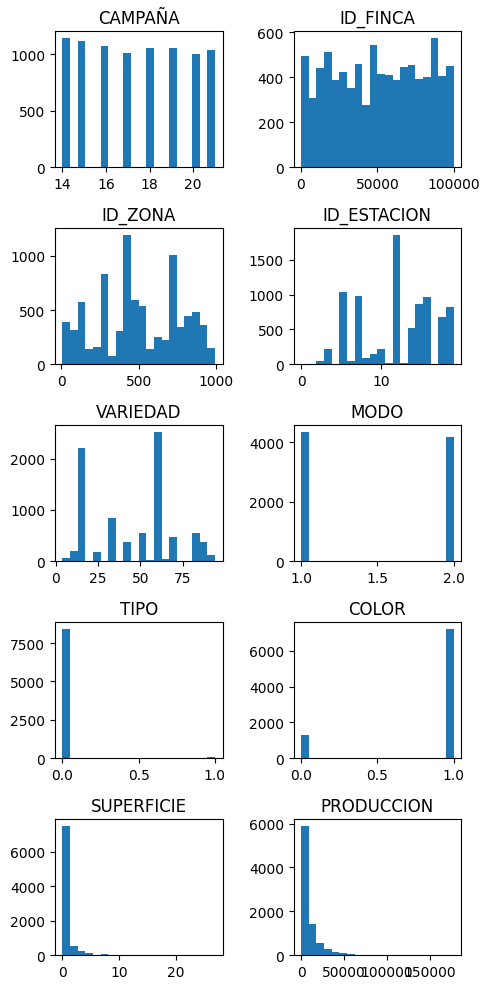

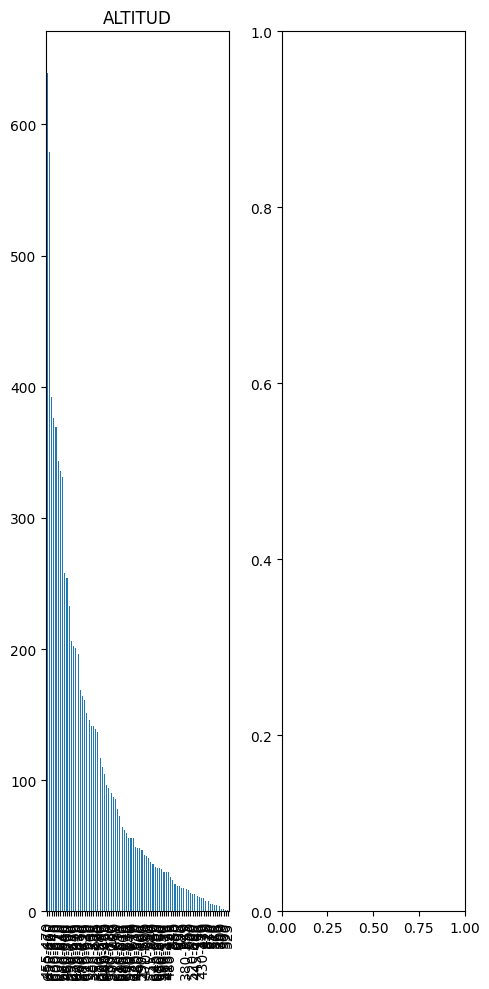

In [84]:
plot_columns(df_train)

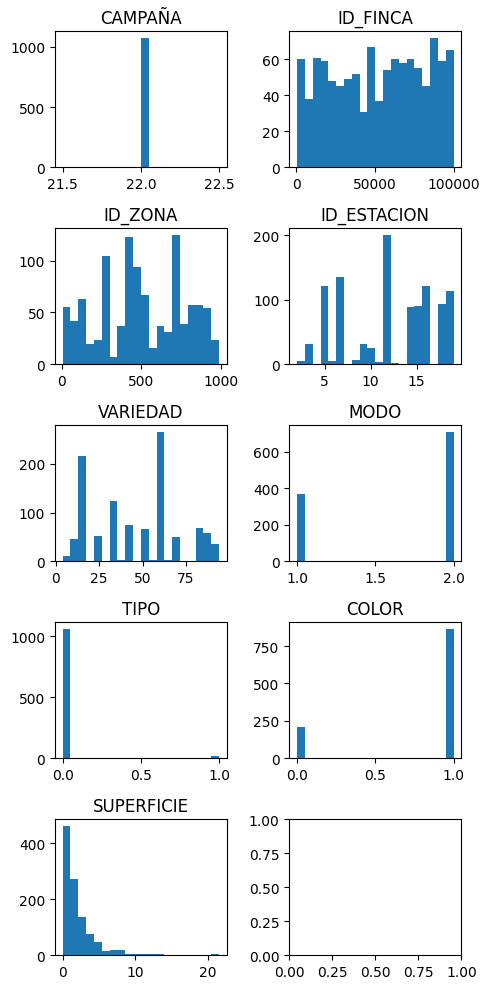

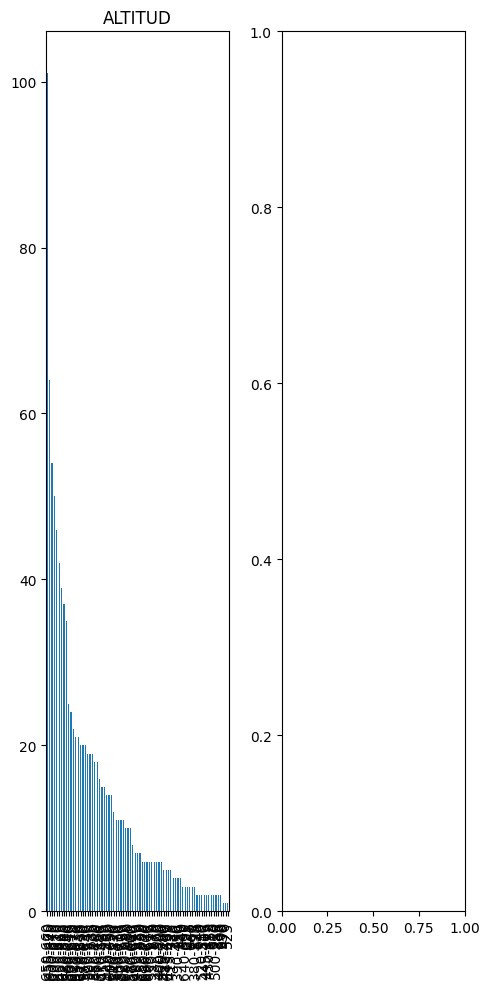

In [85]:
plot_columns(df_test)

# 2. Fill NaN's

In [91]:
df_train[df_train["ALTITUD"].isna()]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
4,14,14001,852,14,NaN,81,1,0,1,0.0000,14126.000
5,14,17059,852,14,NaN,81,1,0,1,0.0000,6054.000
6,14,87611,602,14,NaN,81,1,0,1,0.0000,12900.000
7,14,12257,215,14,NaN,17,1,0,1,0.0000,5450.000
8,14,97286,142,14,NaN,17,1,0,1,0.0000,30720.000
9,14,43323,142,14,NaN,59,1,0,1,0.0000,34880.000
10,14,43323,142,14,NaN,81,1,0,1,0.0000,12650.000
11,14,23258,142,14,NaN,81,1,0,1,0.0000,975.000
75,14,42732,82,14,NaN,17,1,0,1,0.0000,19320.000
1150,15,14001,852,14,NaN,81,1,0,1,0.0000,7470.800


In [95]:
df_test[df_test["ALTITUD"].isna()]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
9172,22,83458,292,3,NaN,10,2,0,1,1.8125,NaN
9173,22,83458,292,3,NaN,26,2,0,1,1.0167,NaN
9174,22,9086,292,12,NaN,26,2,0,1,0.7800,NaN
9175,22,9086,292,12,NaN,52,2,0,1,0.7800,NaN
9433,22,78460,56,15,NaN,81,2,0,1,4.5360,NaN


In [93]:
df_train.isna().sum()

CAMPAÑA         0
ID_FINCA        0
ID_ZONA         0
ID_ESTACION     0
ALTITUD        49
VARIEDAD        0
MODO            0
TIPO            0
COLOR           0
SUPERFICIE      0
PRODUCCION      0
dtype: int64

In [94]:
df_test.isna().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD           5
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE        0
PRODUCCION     1075
dtype: int64

There are no Nan's which can be filled from this dataset itself. The field 'ALTITUD' is important and we need to explore with the other datasets how to do so.

# 3. Study sample 

In [96]:
ID_FINCA = 83458
ID_ZONA = 292

In [98]:
df_train[(df_train["ID_FINCA"] == ID_FINCA) | (df_train["ID_ZONA"] == ID_ZONA)]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
3934,17,9086,292,12,NaN,26,2,0,1,0.0000,3590.000
3935,17,9086,292,12,NaN,52,2,0,1,0.0000,4880.000
5003,18,83458,292,3,NaN,10,2,0,1,0.0000,10490.000
5004,18,83458,292,3,NaN,26,2,0,1,0.0000,6279.000
5005,18,9086,292,12,NaN,26,2,0,1,0.0000,3381.000
5006,18,9086,292,12,NaN,52,2,0,1,0.0000,10010.000
6073,19,83458,292,3,NaN,10,2,0,1,0.0000,9030.000
6074,19,83458,292,3,NaN,26,2,0,1,0.0000,7304.630
6075,19,9086,292,12,NaN,26,2,0,1,0.0000,5635.370
6076,19,9086,292,12,NaN,52,2,0,1,0.0000,3970.000
